In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
# 0~255의 값을 0~1로 바꿈
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
# 검증데이터 생성

In [2]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model
# 모델 생성하는 함수
# a_layer없으면 기본 생성
# 있으면 그 층 추가

In [4]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

2023-11-25 15:49:29.224196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [7]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


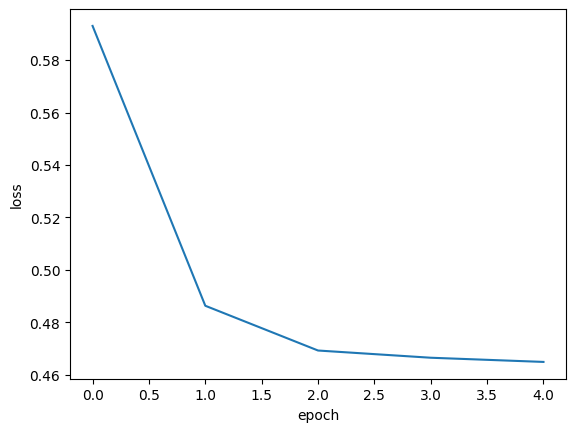

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

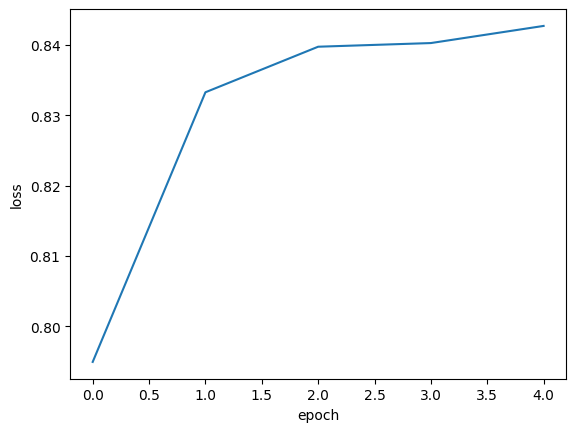

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

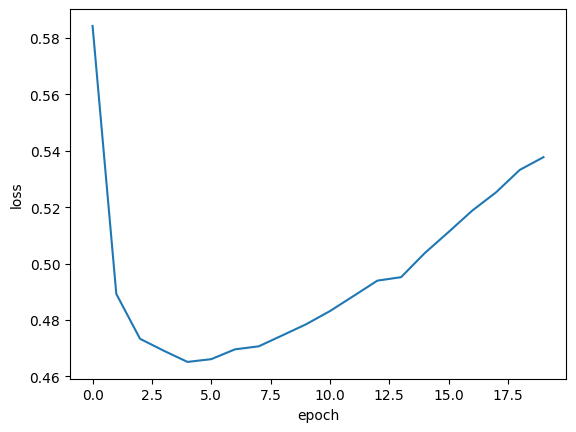

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


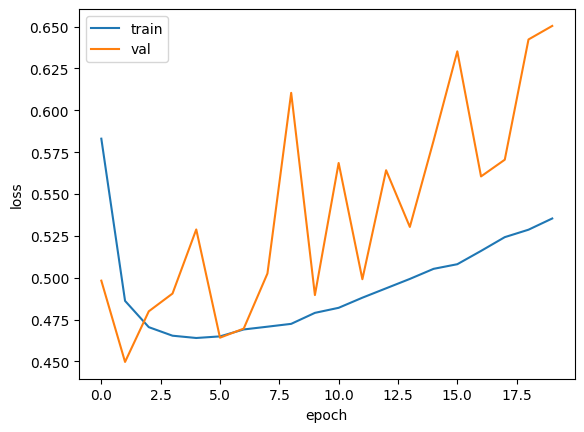

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

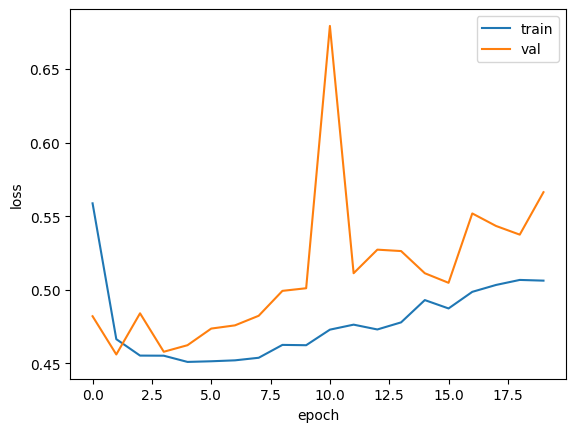

In [14]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


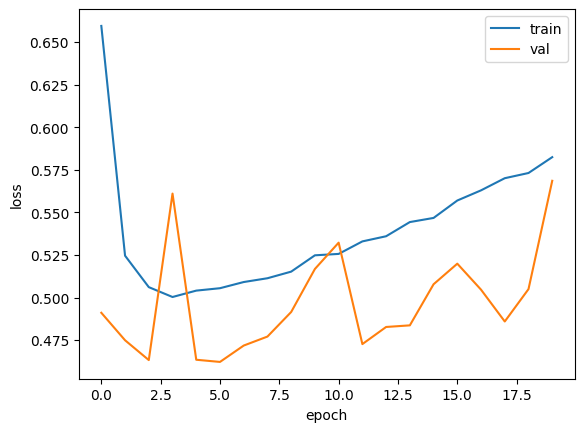

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [18]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [19]:
model.save_weights('model-weights.h5')

In [20]:
model.save('model-whole.h5')

/Users/park/miniconda3/envs/aiNoteBook/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
!ls -al *.h5

-rw-r--r--  1 park  staff  333448 11 25 17:04 model-weights.h5
-rw-r--r--  1 park  staff  982664 11 25 17:05 model-whole.h5


In [23]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
# 모델 파라미터를 적재하는 조건
# load_weights()를 사용하려면 save_weights()로 저장한 모델과 정확히 같은 구조를 가져야함

In [24]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.84775


In [25]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 3ms/step - loss: 0.4458 - accuracy: 0.8478


[0.4458376169204712, 0.8477500081062317]

In [28]:
model = model_fn(keras.layers.Dropout(0.3))
# dropout 30% 실행
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# 모델 컴파일
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
# 최적의 모델을 저장
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [29]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)
# 위에서 최적의 모델이 나왔을때 그 모델을 저장
# 하지만 에포크는 끝까지 실행
# 최적이 나왔을 때 중지하는 것
# 이를 조기 종료라고 함
# 조기 종료는 훈련 에포크 횟수를 제한하는 역할 -> 모델이 과대적합이 되는 것을 막아주는 규제 방법으로 생각 가능

375/375 [==============================] - 2s 3ms/step - loss: 0.4605 - accuracy: 0.8403


[0.4605149030685425, 0.8402500152587891]

In [31]:
# 조기 종료를 위한 EarlyStopping 콜백 사용
# 이 콜백의 patience 매개 변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 저장
# patience=2로 지정 -> 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
# restore_best_weights 매개변수를 True로 지정시 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

# EarlyStooping 콜백을 ModelCheckpoint 콜백과 함께 사용하기
# -> 가장 낮은 검증 손실의 모델을 파일에 저장
# -> 검증 손실이 다시 상승할 때 훈련을 중지 가능
# -> 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
model = model_fn(keras.layers.Dropout(0.3))
# dropout 30% 실행
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# 모델 컴파일
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
# ModelCheckpoint 콜백
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# EarlyStopping콜백

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

/Users/park/miniconda3/envs/aiNoteBook/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
print(early_stopping_cb.stopped_epoch)

3


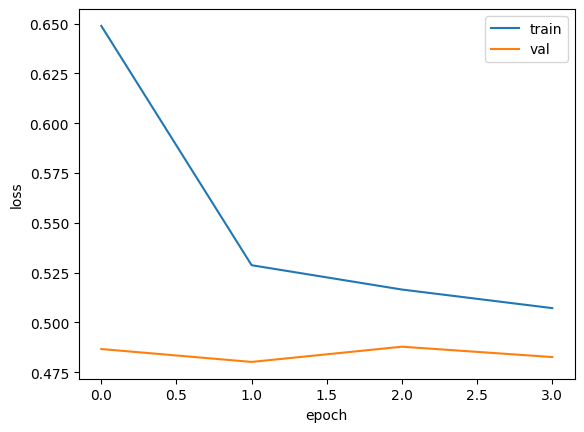

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [35]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4802 - accuracy: 0.8296


[0.48021480441093445, 0.8295833468437195]

드롭아웃: 은닉층에 있는 뉴런의 출력을 랜덤하게 껴서 과대적합을 막는 기법, 드롭하웃은 훈련 중에 적용되며 평가나 예측에서는 적용하지 않음, 텐서플로는 이를 자동으로 처리<br/>
콜백: 케라스 모듈을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구, 대표적으로 최상의 모델을 자동으로 저장해주거나 검증 점수가 더 이상 향상되지 않으면 일찍 종료(모델체크포인트, 얼리스타핑)<br/>
조기종료: 검증 점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법, 계산 비용과 시간 절약<br/>
<br/>EarlyStooping 콜백을 ModelCheckpoint 콜백과 함께 사용하기<br/>
-> 가장 낮은 검증 손실의 모델을 파일에 저장 (모델체크포인트)<br/>
-> 검증 손실이 다시 상승할 때 훈련을 중지 가능 (얼리스타핑의 patience)<br/>
-> 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림 (얼리스타핑의 retore_best_weights)<br/>

## TensorFlow
### Dropout
드롭아웃 층<br/>
첫 번째 매개변수로 드롭아웃 할 비율(r)을 지정<br/>
드롭아웃 하지 않는 뉴런의 출력은 1/(1-r)만큼 증가시켜 출력의 총합이 같도록 만듬<br/>

### save_weights()
모든층의 가중치와 절편을 파일에 저장<br/>
첫 번째 매개변수에 저장할 파일을 지정<br/>
save_format 매개변수에서 저장할 파일 포맷을 지정<br/>
기본적으로 텐서플로의 Checkpoint포맷을 사용<br/>
이 매개변수를 h5로 지정하거나 파일의 확장자가 h5이면 HDF5포맷으로 저장<br/>

### load_weights
모든 층의 가중치와 절편을 파일에 읽음<br/>
첫 번째 매개변수에 읽을 파일을 지정<br/>

### save()
모델 구조와 모든 가중치와 절편을 파일에 저장<br/>
첫 번째 매개변수에 저장할 파일을 지정<br/>
save_format 매개변수에서 저장할 파일 포맷을 지정<br/>
기본적으로 텐서플로의 SavedModel포맷을 사용<br/>
이 매개변수를 h5로 지정하거나 파일의 확장자가 h5이면 HDF5포맷으로 저장<br/>

### load_model()
model.save()로 저장된 모델을 로드<br/>
첫 번째 매개변수에 읽을 파일을 지정<br/>

### ModelCheckPoint
케라스 모델과 가중치를 일정 간격으로 저장<br/>
첫 번째 매개변수에 저장할 파일을 지정<br/>
monitor 매개변수는 모니터링할 지표를 지정, 기본값은 'val_loss'로 검증 손실을 관찰<br/>
save_weights_only 매개변수의 기본값은 False로 전체 모델을 저장, True일 경우 모델의 가중치와 절편만 저장<br/>
save_best_only 매개변수를 True로 지정하면 가장 낮은 검증 점수를 만드는 모델을 저장<br/>

### EarlyStopping
관심 지표가 더이상 향상하지 않으면 훈련을 중지<br/>
monitor 매개변수는 모니터링할 지표를 지정, 기본값은 'val_loss'로 검증 손실을 관찰<br/>
patience 매개변수에 모델이 더 이상 향상되지 않고 지속할 수 있는 최대 에포크 횟수를 지정<br/>
restore_best_weights 매개변수에 최상의 모델 가중치를 복원할지 지정, 기본값은 False<br/>

## NumPy
### argmax
배열에서 축을 따라 최댓값의 인덱스를 반환<br/>
axis 매개변수에서 어떤 축을 따라 최댓값을 찾을지 지정<br/>
기본값은 None으로 전체 배열에서 최댓값을 찾음<br/>